In [21]:
import matplotlib as mpl
import pylab

In [22]:
from matplotlib import pyplot as plt
import pandas as pd

In [23]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 10.0)

In [38]:
results = pd.read_csv("/home/matt/Datasets/Battelle Data/data-extracted/testing_results3.csv")

In [39]:
results = results[results.kernels=='gaussian']

In [40]:
results.drop('kernels',axis=1,inplace=True)

In [41]:
results = results.set_index(['gammas','metrics']).stack().unstack(level=0)

In [42]:
results.head()

gammas         500       525       550       575       600       625   \
metrics                                                                 
AUC     0  0.958870  0.935017  0.904874  0.945355  0.951242  0.938014   
        1  0.935139  0.955194  0.943549  0.950475  0.949356  0.930078   
        2  0.935552  0.947087  0.965896  0.944652  0.952602  0.945989   
        3  0.939588  0.941620  0.941376  0.946942  0.950843  0.945556   
        4  0.932504  0.945348  0.935302  0.951380  0.940502  0.927498   

gammas         650       675       700       725     ...         1350  \
metrics                                              ...                
AUC     0  0.925781  0.945996  0.923515  0.931577    ...     0.938330   
        1  0.956667  0.904230  0.940570  0.925647    ...     0.939076   
        2  0.933803  0.942598  0.947113  0.941216    ...     0.940653   
        3  0.948755  0.945511  0.958559  0.954653    ...     0.945872   
        4  0.942970  0.941671  0.945776  0.950442    ...     0.922779   

gammas         1375      1400      1425      1450      1475      1500  \
metrics                                                                 
AUC     0  0.936869  0.952153  0.922717  0.952716  0.947479  0.967890   
        1  0.921378  0.939401  0.938041  0.958447  0.957950  0.940654   
        2  0.944286  0.931480  0.952740  0.923795  0.950556  0.931684   
        3  0.949931  0.950573  0.951972  0.955211  0.927485  0.948265   
        4  0.936775  0.926718  0.940354  0.920343  0.921806  0.952458   

gammas         1525      1550      1575  
metrics                                  
AUC     0  0.926954  0.914159  0.936139  
        1  0.960700  0.913291  0.946935  
        2  0.935570  0.942709  0.945498  
        3  0.935931  0.929968  0.937580  
        4  0.943681  0.946776  0.940402  

[5 rows x 44 columns]

In [43]:
#precision = results[(results.metrics=='precision') & (results.kernels=='laplace')]
#recall = results[(results.metrics=='recall') & (results.kernels=='laplace')]
#f1 =  results[(results.metrics=='F1') & (results.kernels=='laplace')]

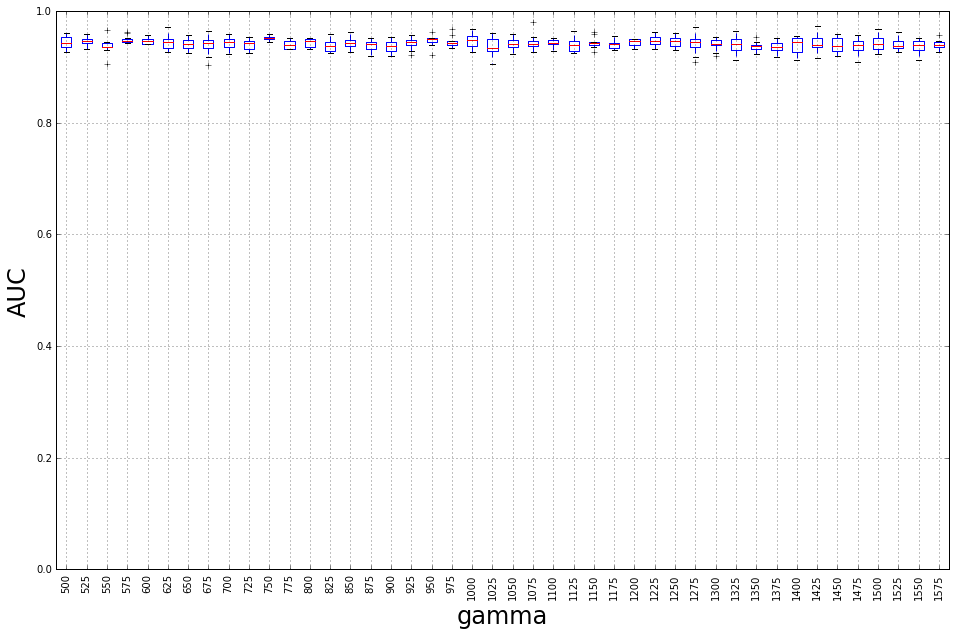

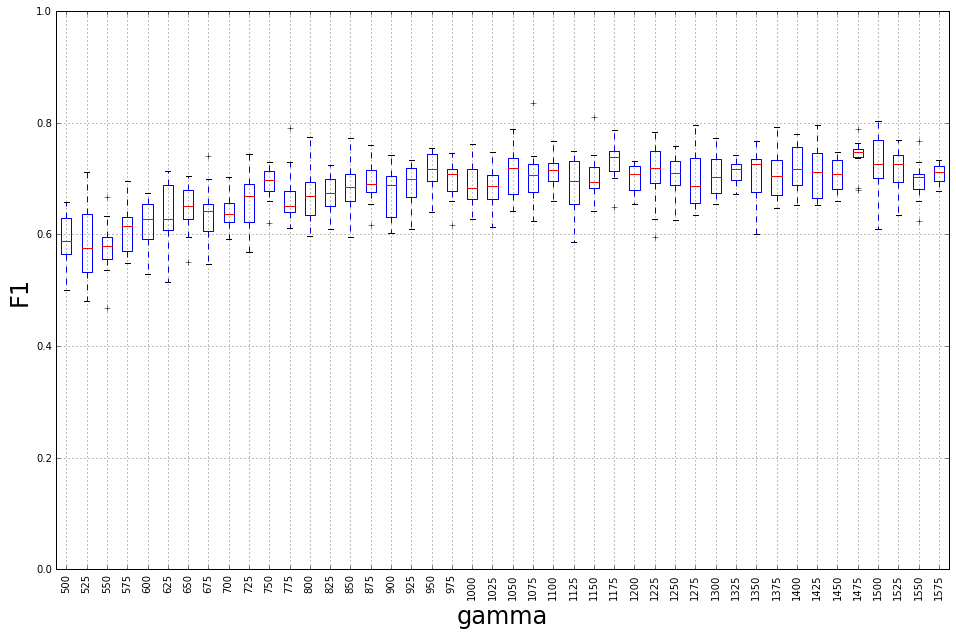

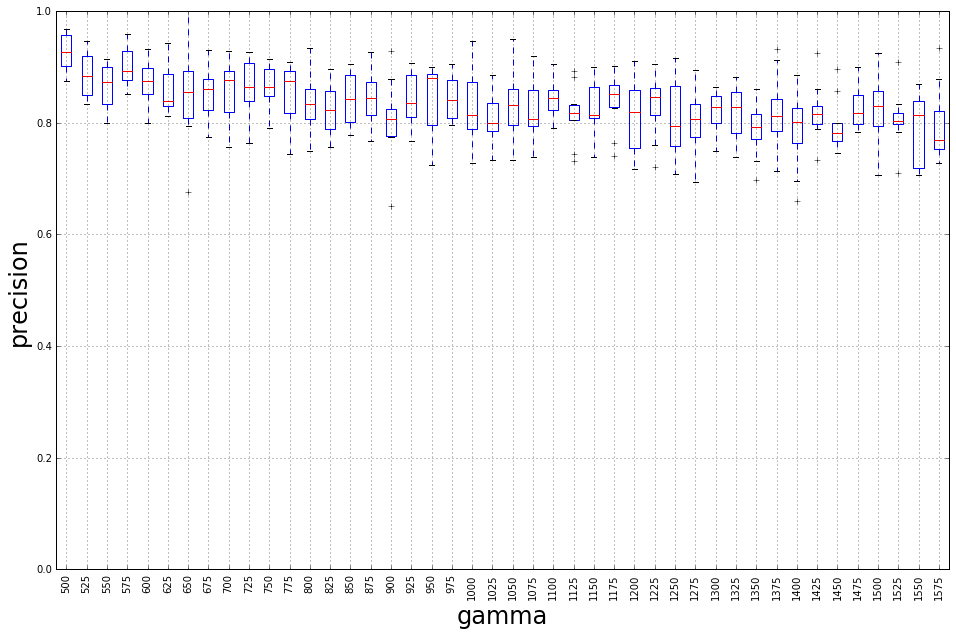

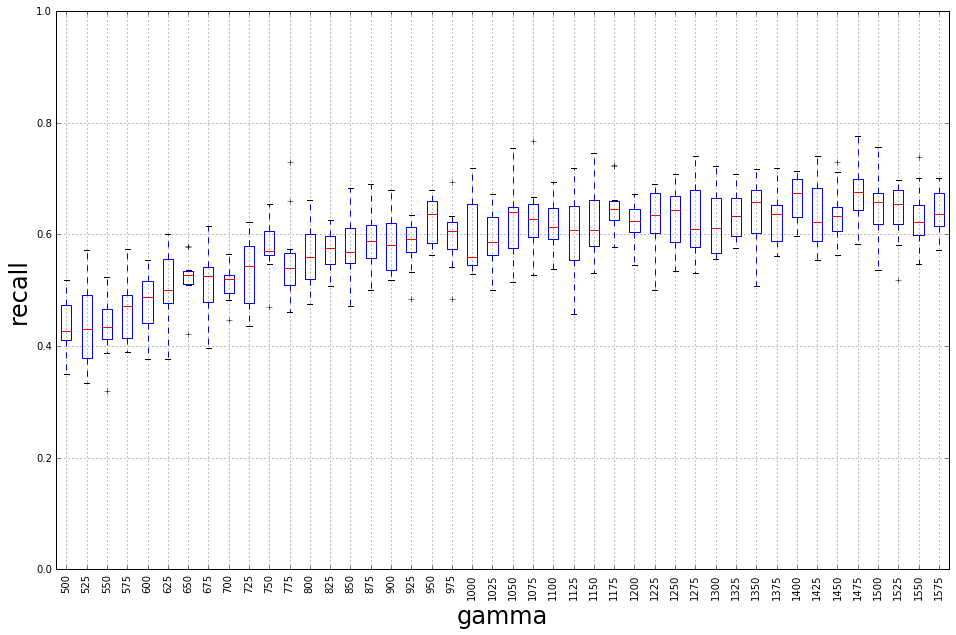

In [52]:
for metric in results.index.levels[0]:
    plot = results.loc[metric].plot(kind='box')
    plot.set_ylabel(metric,size=24)
    plot.set_xlabel("gamma",size=24)
    plot.set_ylim(bottom=0,top=1)
    plot.set_xticklabels(labels=results.columns,rotation=90)
    plot.grid(True)
    fig = plot.get_figure()
    fig.savefig(metric+'_gaussian.png',resolution=300)
    